In [8]:
from matplotlib.ticker import MaxNLocator
import re
from matplotlib.ticker import MultipleLocator
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Single epoch mass estimate using single gaussian broad line models for the emission lines.
path_24 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2024_Analysis/'
conti_results_24 = pd.read_csv(path_24 + 'mcmc_conti_results.csv') # Continuum parameters
line_results_24 = pd.read_csv(path_24 + 'mcmc_line_results.csv') # Individual line parameters
fur_results_24 = pd.read_csv(path_24 + 'mcmc_fur_results.csv') # Combined line complex parameters

path_22 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2022_Analysis/'
conti_results_22 = pd.read_csv(path_22 + 'mcmc_conti_results.csv') # Continuum parameters
line_results_22 = pd.read_csv(path_22 + 'mcmc_line_results.csv') # Individual line parameters
fur_results_22 = pd.read_csv(path_22 + 'mcmc_fur_results.csv') # Combined line complex parameters

path_04 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2009_Analysis/'
conti_results_04 = pd.read_csv(path_04 + 'mcmc_conti_results.csv')
line_results_04 = pd.read_csv(path_04 + 'mcmc_line_results.csv')
fur_results_04 = pd.read_csv(path_04 + 'mcmc_fur_results.csv')

#### Line Flux Ratio's for ZTF18abuamgo

x1 = log(NII/Ha_na)  
x2 = log(SII/Ha_na)  
x3 = log(OI/Ha_na)  
y = log(OIII/Hb_na)

xb = log(OI/Ha)
yb = log(OIII/OII)

NOTE AUTOMATIC LINE PARAMETER IMPORTS USED AT BOTTOM FOR AGN CLASSIFICATION

In [44]:
# Line Flux (Area) 10^-17 erg/s/cm^2/A  (from original PyQSOFit runs)
NII_09 = 6.341166e1 + 1.912641e2 # sum of the two lines
SII_09 = 5.075243e1 + 5.086106e1
OI_09 = 6.064353e1
Ha_09 = 4.844749e2 # narrow components only
OIII_09 = 4.426759e2 + 1.209037e3
Hb_09 = 1.699730e2
OII_09 = 4.130888e2

NII_22 = 74.598771 + 225.006941
SII_22 = 98.275838 + 98.486189
OI_22 = 79.083087
Ha_22 = 596.493273
OIII_22 = 448.536378 + 1369.151859
Hb_22 = 137.535689
OII_22 = 309.044258

# Line ratios to plot
y_09 = np.log10(OIII_09 / Hb_09)
NII_x_09 = np.log10(NII_09 / Ha_09)
SII_x_09 = np.log10(SII_09 / Ha_09)
OI_x_09 = np.log10(OI_09 / Ha_09)

y_22 = np.log10(OIII_22 / Hb_22)
NII_x_22 = np.log10(NII_22 / Ha_22)
SII_x_22 = np.log10(SII_22 / Ha_22)
OI_x_22 = np.log10(OI_22 / Ha_22)

# Additional ratio using OIII/OII and OI/Ha
OIII_y_09 = np.log10(OIII_09 / OII_09) # uses OI_x_09 (Fig.5)
OIII_y_22 = np.log10(OIII_22 / OII_09)



# Narrow line fluxes
line_flux = pd.DataFrame(columns=['HA','HB','OI','OII','OIII','NII','SII'], index=['2004','2022','2024'])

line_flux.loc['2004'] = pd.Series({'HA':512.839000, 'NII':62.890207+189.691237, 'SII':50.022470+50.129539, 'OI':46.149041, 'HB':175.333583, 'OIII':491.206763+1488.771030, 'OII':289.880363})
line_flux.loc['2022'] = pd.Series({'HA':635.637775, 'NII':80.023364+241.368755, 'SII':106.199283+106.426593, 'OI':80.281275, 'HB':150.034906, 'OIII':477.965225+1495.863471, 'OII':353.915279})
line_flux.loc['2024'] = pd.Series({'HA':1549.375965, 'NII':203.191841+612.873031, 'SII':272.907555+273.491689, 'OI':145.065943, 'HB':565.521642, 'OIII':542.047035+1707.966225}) # no OII for 2024

line_flux


# Narrow line fluxesfrom import
line_flux = pd.DataFrame(columns=['HA','HB','OI','OII','OIII','NII','SII'], index=['2004','2022','2024'])

line_flux.loc['2004'] = pd.Series({'HA':line_results_04['Area'][1], 'NII':line_results_04['Area'][2]+line_results_04['Area'][3], 'SII':line_results_04['Area'][4]+line_results_04['Area'][5], 'OI':line_results_04['Area'][6], 'HB':line_results_04['Area'][10], 'OIII':line_results_04['Area'][11]+line_results_04['Area'][12], 'OII':line_results_04['Area'][22]})
line_flux.loc['2022'] = pd.Series({'HA':line_results_22['Area'][1], 'NII':line_results_22['Area'][2]+line_results_22['Area'][3], 'SII':line_results_22['Area'][4]+line_results_22['Area'][5], 'OI':line_results_22['Area'][6], 'HB':line_results_22['Area'][10], 'OIII':line_results_22['Area'][11]+line_results_22['Area'][12], 'OII':line_results_22['Area'][22]})
line_flux.loc['2024'] = ({'HA':line_results_24['Area'][1], 'NII':line_results_24['Area'][2]+line_results_24['Area'][3], 'SII':line_results_24['Area'][4]+line_results_24['Area'][5], 'OI':line_results_24['Area'][6], 'HB':line_results_24['Area'][10], 'OIII':line_results_24['Area'][11]+line_results_24['Area'][12], 'OII':line_results_24['Area'][22]})

line_flux

,HA,HB,OI,OII,OIII,NII,SII
2004,1631.051537,557.510563,202.125249,1454.018864,5010.229442,868.373421,345.16537
2022,2286.505323,529.182333,252.710844,1157.657117,6233.724366,1162.151735,706.750116
2024,1563.717801,448.012699,161.926258,1185.768529,4246.887328,836.207776,551.770504


In [45]:
for index, row in line_flux.iterrows():
    line_flux.at[index, 'log(NII/HA)'] = np.log10(row['NII'] / row['HA'])
    line_flux.at[index, 'log(SII/HA)'] = np.log10(row['SII'] / row['HA'])
    line_flux.at[index, 'log(OI/HA)'] = np.log10(row['OI'] / row['HA'])
    line_flux.at[index, 'log(OIII/HB)'] = np.log10(row['OIII'] / row['HB'])
    line_flux.at[index, 'log(OIII/OII)'] = np.log10(row['OIII'] / row['OII'])

line_flux

,HA,HB,OI,OII,OIII,NII,SII,log(NII/HA),log(SII/HA),log(OI/HA),log(OIII/HB),log(OIII/OII)
2004,1631.051537,557.510563,202.125249,1454.018864,5010.229442,868.373421,345.16537,-0.273761,-0.674440,-0.906847,0.953605,0.537288
2022,2286.505323,529.182333,252.710844,1157.657117,6233.724366,1162.151735,706.750116,-0.293909,-0.509906,-0.956548,1.071142,0.731168
2024,1563.717801,448.012699,161.926258,1185.768529,4246.887328,836.207776,551.770504,-0.271844,-0.452400,-0.984841,0.976780,0.554071


BPT Fitting Lines (Kewley+06)

In [46]:
# NII Plot (Fig.4)
NII_x_fit1 = np.linspace(-1.28, 0, 50) # -1.3036
NII_y_fit1 = 0.61/(NII_x_fit1 - 0.05) + 1.3 # (1)
NII_x_fit2 = np.linspace(-2.2, 0.465, 100)
NII_y_fit2 = 0.61/(NII_x_fit2 - 0.47) + 1.19 # (5)

# SII Plot (Fig.4)
SII_x_fit1 = np.linspace(-3, 0.31, 100)
SII_y_fit1 = 0.72/(SII_x_fit1 - 0.32) + 1.3 # (2)
SII_x_fit2 = np.linspace(-0.3150, 2, 100)
SII_y_fit2 = 1.89 * SII_x_fit2 + 0.76 # (9)

# OI Plot (Fig.4)
OI_x_fit1 = np.linspace(-2.5, -0.9, 100)
OI_y_fit1 = 0.73/(OI_x_fit1 + 0.59) + 1.33 # (3)
OI_x_fit2 = np.linspace(-1.125, 0.2, 50)
OI_y_fit2 = 1.18 * OI_x_fit2 + 1.3 # (10)

# OIII Plot (Fig.5)
OIII_x_fit1 = np.linspace(-2.5, 0, 50)
OIII_y_fit1 = -1.701 * OIII_x_fit1 - 2.163 # (16)
OIII_x_fit2 = np.linspace(-1.05998, 0.5, 50)
OIII_y_fit2 = 1.0 * OIII_x_fit2 + 0.7 # (18)

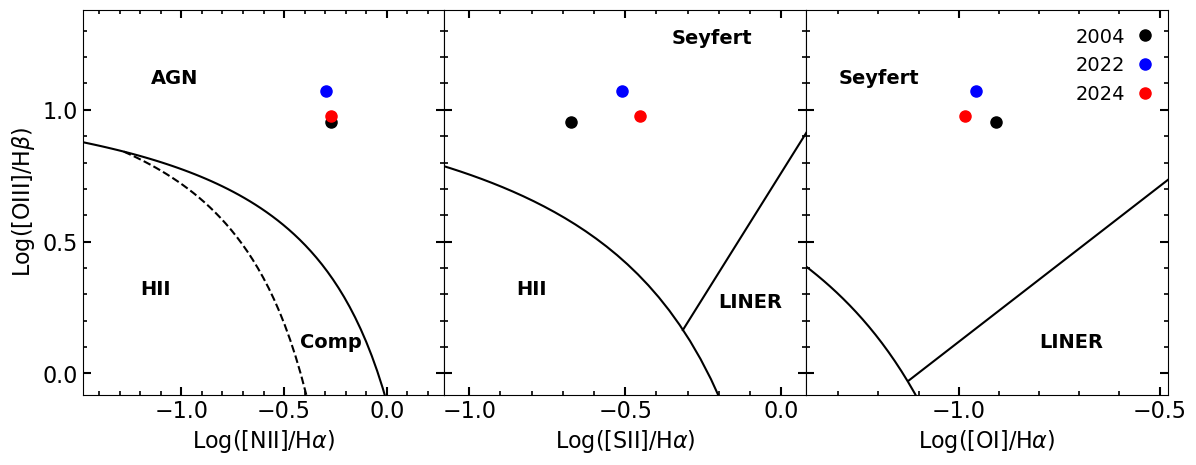

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5), sharey=True)
plt.subplots_adjust(wspace=0)  # Adjust the width space between subplots
#plt.figure(tight_layout=True)

# NII Plot
ax[0].plot(line_flux['log(NII/HA)']['2004'], line_flux['log(OIII/HB)']['2004'], linestyle='None', marker='o', markersize=8, color='black') # data
ax[0].plot(line_flux['log(NII/HA)']['2022'], line_flux['log(OIII/HB)']['2022'], linestyle='None', marker='o', markersize=8, color='blue')
ax[0].plot(line_flux['log(NII/HA)']['2024'], line_flux['log(OIII/HB)']['2024'], linestyle='None', marker='o', markersize=8, color='red')

ax[0].plot(NII_x_fit1, NII_y_fit1, marker='None', linestyle='--', color = 'black') # BPT lines
ax[0].plot(NII_x_fit2, NII_y_fit2, marker='None', linestyle='-', color = 'black')

ax[0].text(-1.15, 1.1, 'AGN', color='black', fontsize=14, weight='bold') # BPT labels
ax[0].text(-1.2, 0.3, 'HII', color='black', fontsize=14, weight='bold')
ax[0].text(-0.42, 0.1, 'Comp', color='black', fontsize=14, weight='bold')

ax[0].set_xlabel(r'Log([NII]/H$\alpha$)', fontsize=16) # Axis
ax[0].set_ylabel(r'Log([OIII]/H$\beta$)', fontsize=16)
ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].set_yticks([y / 10.0 for y in range(0, 15, 5)]) # for loop to set intervals to 0.5 with range() not accepting floats
ax[0].set_xticks([x / 10.0 for x in range(-15, 1, 5)])
ax[0].set_ylim(-0.08, 1.38)
ax[0].set_xlim(-1.48, 0.28)


# SII Plot
ax[1].plot(line_flux['log(SII/HA)']['2004'], line_flux['log(OIII/HB)']['2004'], linestyle='None', marker='o', markersize=8, color='black') # data
ax[1].plot(line_flux['log(SII/HA)']['2022'], line_flux['log(OIII/HB)']['2022'], linestyle='None', marker='o', markersize=8, color='blue')
ax[1].plot(line_flux['log(SII/HA)']['2024'], line_flux['log(OIII/HB)']['2024'], linestyle='None', marker='o', markersize=8, color='red')

ax[1].plot(SII_x_fit1, SII_y_fit1, marker='None', linestyle='-', color = 'black') # BPT lines
ax[1].plot(SII_x_fit2, SII_y_fit2, marker='None', linestyle='-', color = 'black')

ax[1].text(-0.35, 1.25, 'Seyfert', color='black', fontsize=14, weight='bold') # BPT labels
ax[1].text(-0.85, 0.3, 'HII', color='black', fontsize=14, weight='bold')
ax[1].text(-0.2, 0.25, 'LINER', color='black', fontsize=14, weight='bold')

ax[1].set_xlabel(r'Log([SII]/H$\alpha$)', fontsize=16) # Axis
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
#ax[1].set_yticks([y / 10.0 for y in range(0, 15, 5)]) # for loop to set intervals to 0.5 with range() not accepting floats
ax[1].set_xticks([x / 10.0 for x in range(-10, 1, 5)])
ax[1].set_xlim(-1.08, 0.08)


# OI Plot
ax[2].plot(line_flux['log(OI/HA)']['2004'], line_flux['log(OIII/HB)']['2004'], linestyle='None', marker='o', markersize=8, color='black', label='2004') # data
ax[2].plot(line_flux['log(OI/HA)']['2022'], line_flux['log(OIII/HB)']['2022'], linestyle='None', marker='o', markersize=8, color='blue', label='2022')
ax[2].plot(line_flux['log(OI/HA)']['2024'], line_flux['log(OIII/HB)']['2024'], linestyle='None', marker='o', markersize=8, color='red', label='2024')

ax[2].plot(OI_x_fit1, OI_y_fit1, marker='None', linestyle='-', color = 'black') # BPT lines
ax[2].plot(OI_x_fit2, OI_y_fit2, marker='None', linestyle='-', color = 'black')

ax[2].text(-1.3, 1.1, 'Seyfert', color='black', fontsize=14, weight='bold') # BPT labels
ax[2].text(-0.8, 0.1, 'LINER', color='black', fontsize=14, weight='bold')

ax[2].set_xlabel(r'Log([OI]/H$\alpha$)', fontsize=16) # Axis
ax[2].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[2].set_xticks([x / 10.0 for x in range(-20, 10, 5)])
ax[2].set_xlim(-1.38, -0.48)


# More customization? Add ticks inside axis rather than outside
ax[0].tick_params(labelsize=16)
ax[1].tick_params(labelsize=16)
ax[2].tick_params(labelsize=16)
ax[1].tick_params(axis='y', size=0)
ax[2].tick_params(axis='y', size=0)
ax[0].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[0].tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)
ax[1].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[1].tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)
ax[2].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[2].tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)
ax[0].minorticks_on()
ax[1].minorticks_on()
ax[2].minorticks_on()

ax[2].legend(loc='upper right', frameon=False, fontsize=14, markerfirst=False, handlelength = 0.5)

#ax[0].quiver(NII_x_09, y_09, (NII_x_22 - NII_x_09), (y_22 - y_09), angles='xy', scale_units='xy', scale=1.22, color='black', width=0.008, headlength=4, headaxislength=3.5) # Arrows
#ax[1].quiver(SII_x_09, y_09, (SII_x_22 - SII_x_09), (y_22 - y_09), angles='xy', scale_units='xy', scale=1.088, color='black', width=0.008, headlength=4, headaxislength=3.5)
#ax[2].quiver(OI_x_09, y_09, (OI_x_22+0.004 - OI_x_09), (y_22 - y_09), angles='xy', scale_units='xy', scale=1.22, color='black', width=0.008, headlength=4, headaxislength=3.5)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "bpt_evolution.png"
save_path = custom_path + custom_filename
plt.savefig(save_path)
plt.show()

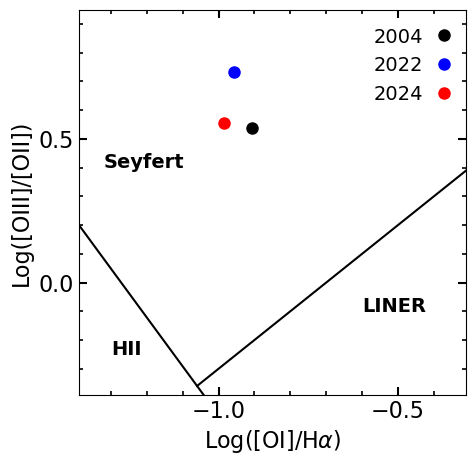

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(line_flux['log(OI/HA)']['2004'], line_flux['log(OIII/OII)']['2004'], linestyle='None', marker='o', markersize=8, color='black', label='2004') # data
ax.plot(line_flux['log(OI/HA)']['2022'], line_flux['log(OIII/OII)']['2022'], linestyle='None', marker='o', markersize=8, color='blue', label='2022')
ax.plot(line_flux['log(OI/HA)']['2024'], line_flux['log(OIII/OII)']['2024'], linestyle='None', marker='o', markersize=8, color='red', label='2024')

ax.plot(OIII_x_fit1, OIII_y_fit1, color='black') # BPT lines
ax.plot(OIII_x_fit2, OIII_y_fit2, color='black')

ax.text(-1.32, 0.4, 'Seyfert', color='black', fontsize=14, weight='bold') # BPT labels
ax.text(-1.3, -0.25, 'HII', color='black', fontsize=14, weight='bold')
ax.text(-0.6, -0.1, 'LINER', color='black', fontsize=14, weight='bold')

ax.set_xlabel(r'Log([OI]/H$\alpha$)', fontsize=16) # Axis
ax.set_ylabel(r'Log([OIII]/[OII])', fontsize=16)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yticks([y / 10.0 for y in range(0, 6, 5)])
ax.set_xticks([x / 10.0 for x in range(-10, -4, 5)])
ax.set_xlim(-1.39, -0.31)
ax.set_ylim(-0.39, 0.95)

ax.tick_params(labelsize=16)
ax.tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax.tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)
ax.minorticks_on()

plt.legend(loc='upper right', frameon=False, fontsize=14, markerfirst=False, handlelength = 0.5)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "bpt_evolution_2.png"
save_path = custom_path + custom_filename
plt.savefig(save_path)
plt.show()

Plot BPT Diagram (NII, SII, OI subplots)

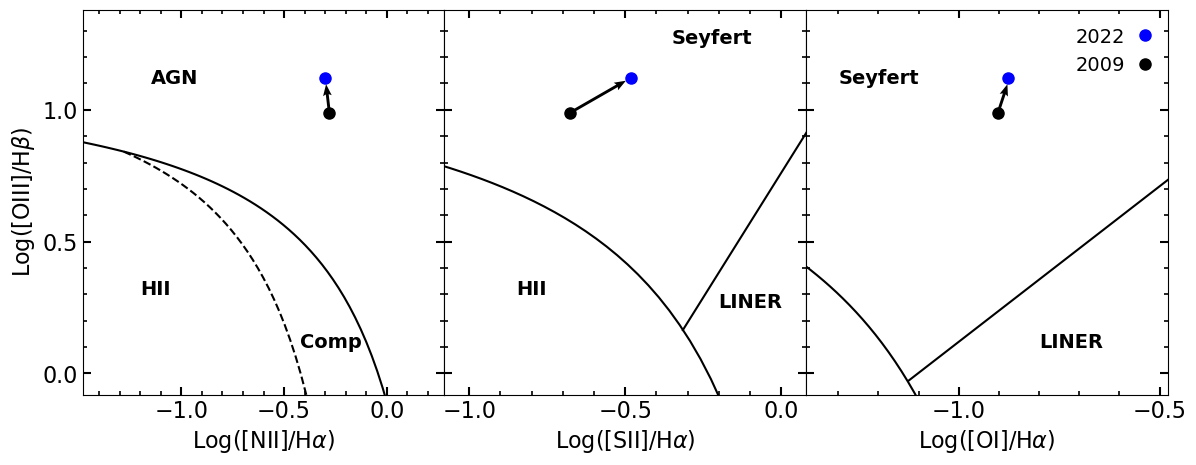

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5), sharey=True)
plt.subplots_adjust(wspace=0)  # Adjust the width space between subplots
#plt.figure(tight_layout=True)

# NII Plot
ax[0].plot(NII_x_09, y_09, linestyle='None', marker='o', markersize=8, color='black') # data
ax[0].plot(NII_x_22, y_22, linestyle='None', marker='o', markersize=8, color='blue')

ax[0].plot(NII_x_fit1, NII_y_fit1, marker='None', linestyle='--', color = 'black') # BPT lines
ax[0].plot(NII_x_fit2, NII_y_fit2, marker='None', linestyle='-', color = 'black')

ax[0].text(-1.15, 1.1, 'AGN', color='black', fontsize=14, weight='bold') # BPT labels
ax[0].text(-1.2, 0.3, 'HII', color='black', fontsize=14, weight='bold')
ax[0].text(-0.42, 0.1, 'Comp', color='black', fontsize=14, weight='bold')

ax[0].set_xlabel(r'Log([NII]/H$\alpha$)', fontsize=16) # Axis
ax[0].set_ylabel(r'Log([OIII]/H$\beta$)', fontsize=16)
ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].set_yticks([y / 10.0 for y in range(0, 15, 5)]) # for loop to set intervals to 0.5 with range() not accepting floats
ax[0].set_xticks([x / 10.0 for x in range(-15, 1, 5)])
ax[0].set_ylim(-0.08, 1.38)
ax[0].set_xlim(-1.48, 0.28)


# SII Plot
ax[1].plot(SII_x_09, y_09, linestyle='None', marker='o', markersize=8, color='black') # data
ax[1].plot(SII_x_22, y_22, linestyle='None', marker='o', markersize=8, color='blue')

ax[1].plot(SII_x_fit1, SII_y_fit1, marker='None', linestyle='-', color = 'black') # BPT lines
ax[1].plot(SII_x_fit2, SII_y_fit2, marker='None', linestyle='-', color = 'black')

ax[1].text(-0.35, 1.25, 'Seyfert', color='black', fontsize=14, weight='bold') # BPT labels
ax[1].text(-0.85, 0.3, 'HII', color='black', fontsize=14, weight='bold')
ax[1].text(-0.2, 0.25, 'LINER', color='black', fontsize=14, weight='bold')

ax[1].set_xlabel(r'Log([SII]/H$\alpha$)', fontsize=16) # Axis
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
#ax[1].set_yticks([y / 10.0 for y in range(0, 15, 5)]) # for loop to set intervals to 0.5 with range() not accepting floats
ax[1].set_xticks([x / 10.0 for x in range(-10, 1, 5)])
ax[1].set_xlim(-1.08, 0.08)


# OI Plot
ax[2].plot(OI_x_22, y_22, linestyle='None', marker='o', markersize=8, color='blue', label='2022') # data
ax[2].plot(OI_x_09, y_09, linestyle='None', marker='o', markersize=8, color='black', label='2009')

ax[2].plot(OI_x_fit1, OI_y_fit1, marker='None', linestyle='-', color = 'black') # BPT lines
ax[2].plot(OI_x_fit2, OI_y_fit2, marker='None', linestyle='-', color = 'black')

ax[2].text(-1.3, 1.1, 'Seyfert', color='black', fontsize=14, weight='bold') # BPT labels
ax[2].text(-0.8, 0.1, 'LINER', color='black', fontsize=14, weight='bold')

ax[2].set_xlabel(r'Log([OI]/H$\alpha$)', fontsize=16) # Axis
ax[2].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[2].set_xticks([x / 10.0 for x in range(-20, 10, 5)])
ax[2].set_xlim(-1.38, -0.48)


# More customization? Add ticks inside axis rather than outside
ax[0].tick_params(labelsize=16)
ax[1].tick_params(labelsize=16)
ax[2].tick_params(labelsize=16)
ax[1].tick_params(axis='y', size=0)
ax[2].tick_params(axis='y', size=0)
ax[0].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[0].tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)
ax[1].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[1].tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)
ax[2].tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax[2].tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)
ax[0].minorticks_on()
ax[1].minorticks_on()
ax[2].minorticks_on()

ax[2].legend(loc='upper right', frameon=False, fontsize=14, markerfirst=False, handlelength = 0.5)

ax[0].quiver(NII_x_09, y_09, (NII_x_22 - NII_x_09), (y_22 - y_09), angles='xy', scale_units='xy', scale=1.22, color='black', width=0.008, headlength=4, headaxislength=3.5) # Arrows
ax[1].quiver(SII_x_09, y_09, (SII_x_22 - SII_x_09), (y_22 - y_09), angles='xy', scale_units='xy', scale=1.088, color='black', width=0.008, headlength=4, headaxislength=3.5)
ax[2].quiver(OI_x_09, y_09, (OI_x_22+0.004 - OI_x_09), (y_22 - y_09), angles='xy', scale_units='xy', scale=1.22, color='black', width=0.008, headlength=4, headaxislength=3.5)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "bpt_evolution.png"
save_path = custom_path + custom_filename
#plt.savefig(save_path)
plt.show()

Plot Additional OIII/OII BPT Diagram

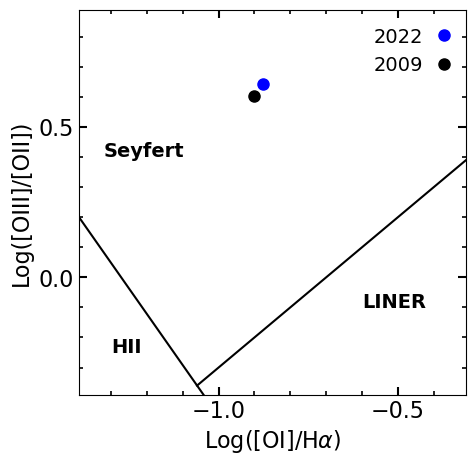

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(OI_x_22, OIII_y_22, linestyle='None', marker='o', markersize=8, color='blue', label='2022') # data
ax.plot(OI_x_09, OIII_y_09, linestyle='None', marker='o', markersize=8, color='black', label='2009')

ax.plot(OIII_x_fit1, OIII_y_fit1, color='black') # BPT lines
ax.plot(OIII_x_fit2, OIII_y_fit2, color='black')

ax.text(-1.32, 0.4, 'Seyfert', color='black', fontsize=14, weight='bold') # BPT labels
ax.text(-1.3, -0.25, 'HII', color='black', fontsize=14, weight='bold')
ax.text(-0.6, -0.1, 'LINER', color='black', fontsize=14, weight='bold')

ax.set_xlabel(r'Log([OI]/H$\alpha$)', fontsize=16) # Axis
ax.set_ylabel(r'Log([OIII]/[OII])', fontsize=16)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yticks([y / 10.0 for y in range(0, 6, 5)])
ax.set_xticks([x / 10.0 for x in range(-10, -4, 5)])
ax.set_xlim(-1.39, -0.31)
ax.set_ylim(-0.39, 0.89)

ax.tick_params(labelsize=16)
ax.tick_params(axis='both', direction='in', which='major', top=True, right=True, labelsize=16, size=6, width=1.5)
ax.tick_params(axis='both', direction='in', which='minor', top=True, right=True, labelsize=16, size=3, width=1.2)
ax.minorticks_on()

plt.legend(loc='upper right', frameon=False, fontsize=14, markerfirst=False, handlelength = 0.5)

# Save figure
custom_path = "/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/"
custom_filename = "bpt_evolution_2.png"
save_path = custom_path + custom_filename
plt.savefig(save_path)
plt.show()